In [1]:
import tweepy
import re
# from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
# import wordcloud as WordCloud
import pickle
import pandas as pd
import networkx as nx
import community

In [2]:
consumer_key = 'HTwKYzhW3mtncK1YBz4HW2pEh'
consumer_secret = 'vMmWPWVnCPv6pO9bRkHvcwnrWylB0XWXIE65k6GcpdmwfpVjwU'
access_token = '1118074022309183488-6parMHAaMpLXdnW6hzV4Vm0LlWRjf1'
access_token_secret = 'Ei8XcqliZVbzjQZGHrXRexqWouVx68Cx8pCbadxWvAYpr'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [3]:
def get_tweets(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, q=keyword).items(numOfTweets):
        # Add tweets in this format
        dict_ = {'Screen Name': tweet.user.screen_name,
                'User Name': tweet.user.name,
                'Tweet Created At': tweet.created_at,
                'Tweet Text': tweet.text,
                'User Location':tweet.user.location,
                 'User id':tweet.user.id,
                'Tweet Coordinates': tweet.coordinates,
                'Retweet Count': tweet.retweet_count,
                'tweet id': tweet.id,
                'Retweeted': tweet.retweeted,
                'Phone Type': tweet.source,
                'Favorite Count': tweet.favorite_count,
                'Favorited': tweet.favorited,
                'Replied': tweet.in_reply_to_status_id_str
                }
        listOfTweets.append(dict_)   
    return listOfTweets

In [4]:
listofTweets=[]
get_tweets(listofTweets,'data science',50)

[{'Screen Name': 'ZyberGudari',
  'User Name': 'Goiko',
  'Tweet Created At': datetime.datetime(2019, 5, 7, 10, 3, 29),
  'Tweet Text': 'Checking out "AI-Generated Rap Songs" on Data Science Central: https://t.co/aUETT4bBlg',
  'User Location': '',
  'User id': 929050503853592576,
  'Tweet Coordinates': None,
  'Retweet Count': 0,
  'tweet id': 1125702685880197120,
  'Retweeted': False,
  'Phone Type': 'Twitter Web Client',
  'Favorite Count': 0,
  'Favorited': False,
  'Replied': None},
 {'Screen Name': 'poblacion_csic',
  'User Name': 'Población CSIC',
  'Tweet Created At': datetime.datetime(2019, 5, 7, 10, 3, 20),
  'Tweet Text': 'RT @FCBillari: Data Science, Society and Forecasts: the 2019 Alberto Dondena Lecture @DondenaCentre @Unibocconi by @alexvespi 14 May @ 5 PM…',
  'User Location': 'Madrid',
  'User id': 366661199,
  'Tweet Coordinates': None,
  'Retweet Count': 5,
  'tweet id': 1125702650002116608,
  'Retweeted': False,
  'Phone Type': 'Twitter Web Client',
  'Favorite Coun

In [31]:


def node_edges(main_person,max_edges):
    user_node=[]
    friend_node=[]
    friend_node1=[]
    friend_node2=[]
    friend_node3=[]
    max_edges=2
    if len(api.friends_ids(screen_name=main_person))>=max_edges:
        no_of_nodes=max_edges
    else:
        no_of_nodes=len(api.friends_ids(screen_name=main_person))
    ids1=[]
    for page in tweepy.Cursor(api.friends_ids, screen_name=main_person,count=no_of_nodes).pages(1):
        for k in range(no_of_nodes):
            user_node.append(main_person)
        ids1.extend(page)
        for i in ids1:
            user = api.get_user(i)
            friend_node1.append(user.screen_name)
            friend_node.append(user.screen_name)
    for z in range(len(friend_node1)):
        if len(api.friends_ids(screen_name=friend_node1[z]))>=max_edges:
            no_of_nodes=max_edges
        else:
            no_of_nodes=len(api.friends_ids(screen_name=friend_node1[z]))
        ids2 = []
        for page in tweepy.Cursor(api.friends_ids, screen_name=friend_node1[z],count=no_of_nodes).pages(1):
            for k in range(no_of_nodes):
                user_node.append(friend_node1[z])
            ids2.extend(page)
            for i in ids2:
                user = api.get_user(i)
                friend_node2.append(user.screen_name)
                friend_node.append(user.screen_name)
    for r in range(len(friend_node2)):
        if len(api.friends_ids(screen_name=friend_node2[r]))>=max_edges:
            no_of_nodes=max_edges
        else:
            no_of_nodes=len(api.friends_ids(screen_name=friend_node2[r]))
        ids3 = []
        for page in tweepy.Cursor(api.friends_ids, screen_name=friend_node2[r],count=no_of_nodes).pages(1):
            for k in range(no_of_nodes):
                user_node.append(friend_node2[r])
            ids3.extend(page)
            for i in ids3:
                user = api.get_user(i)
                friend_node3.append(user.screen_name)
                friend_node.append(user.screen_name)
    return user_node,friend_node

    
    
        
    

In [34]:
max_edges=2
#listofTweets[2]['Screen Name']
main_person='kiru'
user_node,friend_node=node_edges(main_person,max_edges)

Rate limit reached. Sleeping for: 820


In [35]:
type(friend_node)

list

In [4]:
print(len(user_node))
print(len(friend_node))

14
14


In [5]:
print(user_node)
print(friend_node)

['kiru', 'kiru', 'brookeareid', 'brookeareid', 'julsraemy', 'julsraemy', 'Ettore_Rizza', 'Ettore_Rizza', 'nichtich', 'nichtich', 'kiru', 'kiru', 'amelie_courtin', 'amelie_courtin']
['brookeareid', 'julsraemy', 'Ettore_Rizza', 'nichtich', 'kiru', 'amelie_courtin', 'pythontrending', 'PythonHub', 'marianacmalta', 'ACMHT', 'brookeareid', 'julsraemy', 'WikiCommons', 'Alix_Tz']


In [6]:
import csv
with open("C:/Users/akhil/Downloads/nodes_finally123.txt", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(list(zip(user_node, friend_node)))


In [9]:
G_fb = nx.read_edgelist("C:/Users/akhil/Downloads/nodes_finally123.txt", create_using = nx.Graph())

In [10]:
#Quick snapshot of the Network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 11
Average degree:   1.8333


In [11]:
spring_pos = nx.spring_layout(G_fb)

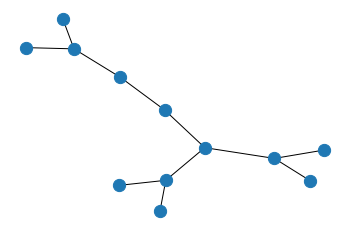

In [12]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 150)

In [13]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

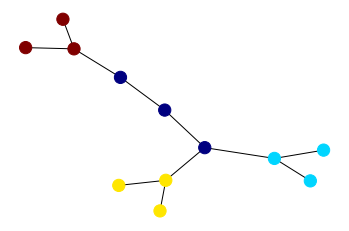

In [14]:
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 150, with_labels = False)

In [15]:
sizes=[x[1]*250 for x in G_fb.degree()]

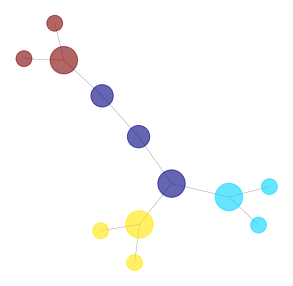

In [18]:
plt.figure(figsize=(5,5))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=False,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_in_cluster.png')

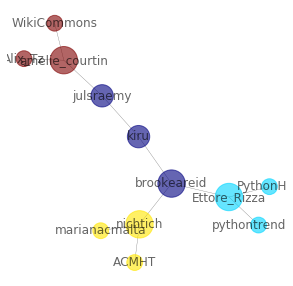

In [20]:
plt.figure(figsize=(5,5))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_in_cluster.png')

In [21]:
circle_pos=nx.circular_layout(G_fb)

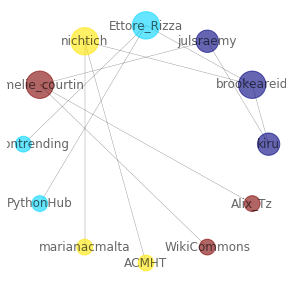

In [22]:
plt.figure(figsize=(5,5))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = circle_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_circluar.png')

In [23]:
G_fb.degree()

DegreeView({'kiru': 2, 'brookeareid': 3, 'julsraemy': 2, 'Ettore_Rizza': 3, 'nichtich': 3, 'amelie_courtin': 3, 'pythontrending': 1, 'PythonHub': 1, 'marianacmalta': 1, 'ACMHT': 1, 'WikiCommons': 1, 'Alix_Tz': 1})

In [36]:
p=[]
q=[]
for x in G_fb.degree():
    p.append(x[0])
    q.append(x[1])

In [37]:
max_degree=pd.DataFrame(list(zip(p,q)),columns=['Name','Cent'])

In [47]:
x=[]
y=[]
for i in range(10):
    x.append(df1.Name[i])
    y.append(df1.Cent[i])

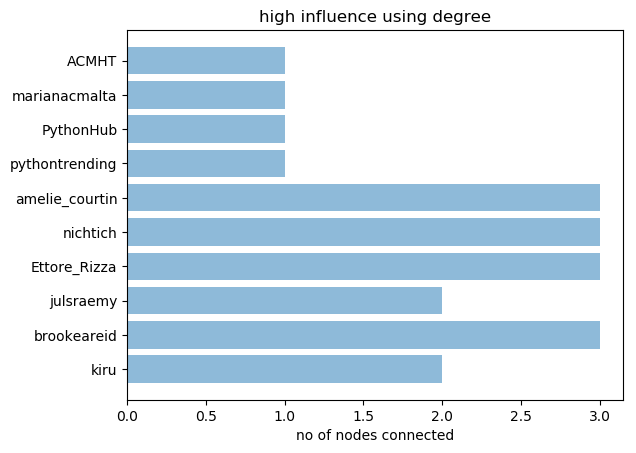

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = x
y_pos = np.arange(len(objects))
performance = y

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('no of nodes connected')
plt.title('high influence using degree')

plt.show()